In [35]:
from gurobipy import *
import numpy as np
import time

prueba = 1+2

# Problema 1

In [36]:
#Abrir un archivo excel
import pandas as pd

#como leer un archivo .csv
data = pd.read_csv('clientes2.csv', sep=';')
print(data)


            x         y   demanda
0      7,9744  -11,3045   147,199
1    -13,6786   -3,3825   161,327
2     -8,8032  -10,3279  172,4834
3    -15,3621    9,4144  133,8201
4     -9,0891   -7,9311  129,8221
..        ...       ...       ...
995   -6,2143    -10,86  155,4059
996  -11,7203   -2,1472  132,1921
997    6,4149    7,9825  126,1607
998    5,9054   12,7097  156,3924
999   -9,4583   -7,1544  141,3835

[1000 rows x 3 columns]


## Pre-procesamiento

In [37]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        valor = data.iloc[i,j]
        valor = valor.replace(",",".")
        data.iloc[i,j] = valor
data = data.applymap(float)

# data = data.iloc[0:100]
print(data)

           x        y   demanda
0     7.9744 -11.3045  147.1990
1   -13.6786  -3.3825  161.3270
2    -8.8032 -10.3279  172.4834
3   -15.3621   9.4144  133.8201
4    -9.0891  -7.9311  129.8221
..       ...      ...       ...
995  -6.2143 -10.8600  155.4059
996 -11.7203  -2.1472  132.1921
997   6.4149   7.9825  126.1607
998   5.9054  12.7097  156.3924
999  -9.4583  -7.1544  141.3835

[1000 rows x 3 columns]


C:\Users\mrive\AppData\Local\Temp\ipykernel_22452\2553919280.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(float)


### Pregunta 1

Programar una función que reciba un centro aleatorio (x,y) y un conjunto de datos de clientes con sus pesos. Definiendo como método de detención que la diferencia de coordenadas entre iteraciones no sea mayor que 1*10^-5. El algoritmo debe reportar la ubicación óprima, el tiempo de ejecución y el número de iteraciones realizadas para encontrar el óptimo

In [67]:
import random
import time

def centro_euclidiano(x=0, y=0, data=0, logs = True):
    
    data = data.reset_index(drop=True)
    
    x_new = x+1
    y_new = y+1

    x_i = data.iloc[:,0]
    y_i = data.iloc[:,1]
    pesos = data.iloc[:,2]
    contador = 0
    time_0 = time.time()
    while (abs(x-x_new)>0.00001 and abs(y-y_new)>0.00001):
        contador += 1
        sum = 0
        sum_new_x = 0
        sum_g_i = 0
        sum_new_y = 0
        for i in range(len(data)):
        
            distancia = ((x-float(x_i[i]))**2+(y-float(y_i[i]))**2)**(1/2)
            fx = float(pesos[i])*distancia
            sum += fx
            
            g_i= (pesos[i]/distancia)
            
            sum_new_x += (x_i[i]*g_i)
            sum_new_y += (y_i[i]*g_i)
            sum_g_i += g_i
            time_n = time.time()
            
        x, y = x_new, y_new
        x_new = sum_new_x/sum_g_i
        y_new = sum_new_y/sum_g_i
        tiempo = time_n-time_0
    if logs:
        print(f'El modelo de localización arrojó las coordenadas x: {x_new} y: {y_new}')
        print(f'El modelo se demoró un tiempo de {tiempo} segundos y {contador} iteraciones')
    return x_new, y_new, tiempo, contador


x=random.randint(-2,2)
y=random.randint(-2,2)
posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data)

    

El modelo de localización arrojó las coordenadas x: -2.1912824007236202 y: -4.507447416659546
El modelo se demoró un tiempo de 0.4131007194519043 segundos y 38 iteraciones


### Pregunta 2
Usando los datos de 'clientes2.csv' y tomando una muestra de 250 clientes al azar, realice 100 repeticiones del algoritmo partiendo desde distintos puntos aleatorios. Reporte los estadísticos básicos (media, desviación, gráfico box plot) para los tiempos de ejecución y número de iteraciones

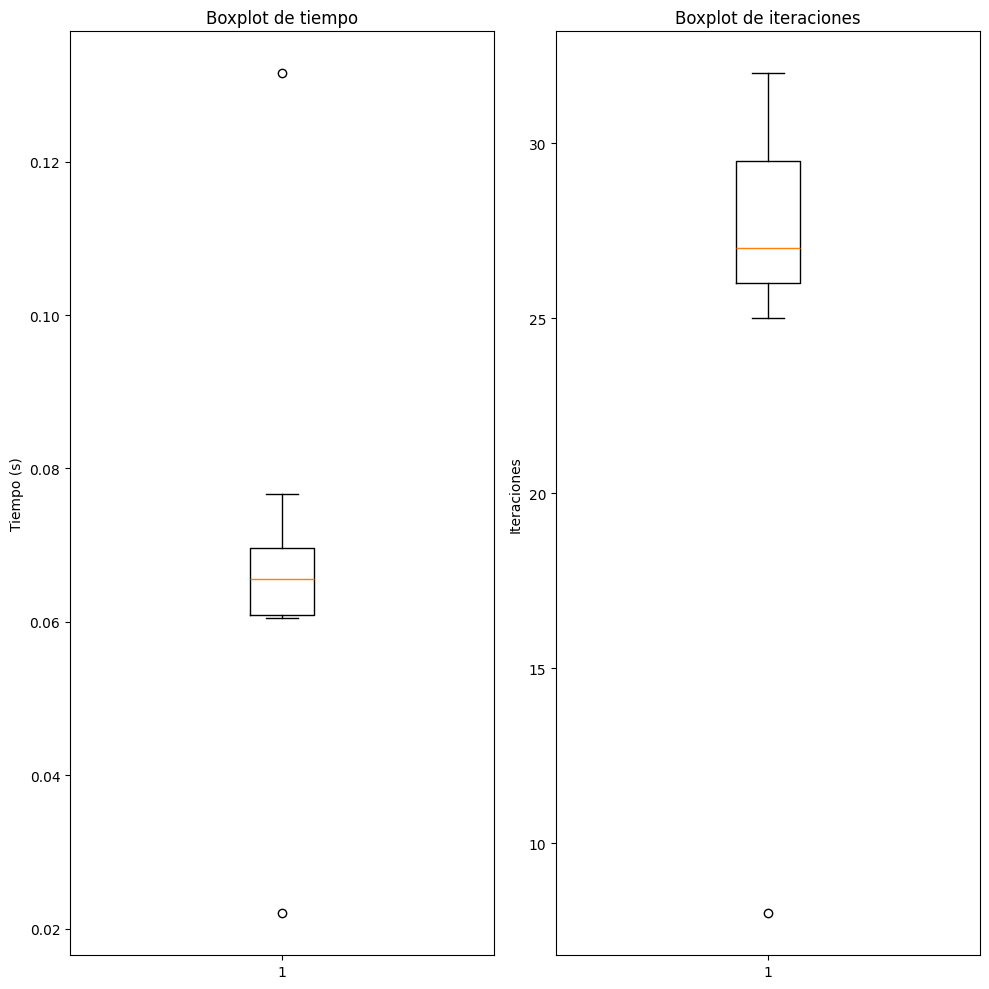

In [68]:
import matplotlib.pyplot as plt

data_sample = data.sample(n=250)


max_value_x = round(data_sample.iloc[:,0].max())
min_value_x = round(data_sample.iloc[:,0].min())
max_value_y = round(data_sample.iloc[:,1].max())
min_value_y = round(data_sample.iloc[:,1].min())

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(1,11):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_sample, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]
    
df_estadisticos.describe()

fig, axes = plt.subplots(1,2,figsize=(10,10))

axes[0].boxplot(df_estadisticos['tiempo'])
axes[0].set_title('Boxplot de tiempo')
axes[0].set_ylabel('Tiempo (s)')

axes[1].boxplot(df_estadisticos['iteraciones'])
axes[1].set_title('Boxplot de iteraciones')
axes[1].set_ylabel('Iteraciones')

plt.tight_layout()

plt.show()
